# *Airline Customer Satisfaction*
                        - by aaqil


## Problem statement

*Objective*: We aim to discern the primary determinants of customer contentment within the airline sector.

Our specific goals are as follows:

    a. Data Analysis: Analyze customer feedback data in order to gain insights for shaping passenger satisfaction.
    b. Recommendation Formulation:Suggest practical ways to make passengers satisfy.
    c. Impact Assessment: Assess the effects and outcomes of these recommendations on the overall level of customer satisfaction.

### *1.Importing the necessary libraries*


In [100]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot  as  plt 
%matplotlib inline 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [101]:
df = pd.read_csv("Airline customer satisfaction file.csv")

In [102]:
df. head( )

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [103]:
df.shape

(129880, 25)

In [104]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [105]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

393 null values are present in the arrival delay.

### 2.*Data Cleaning*

In [106]:
#Dropping of missing values from the data .
#This won't be affecting as they are significantly less compared to the volume of data.
df.dropna(inplace=True)

In [107]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [108]:
df["Age"].max()

85

In [109]:
df["Age"].min()

7

In [110]:
#Binning of age column
bins = [0,20,30,40,50,60,70,80,float('inf')]
labels=['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81+']
df['Age_Group'] = pd.cut(df['Age'],bins=bins,labels=labels)

In [111]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_Group
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,51-60
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,31-40
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0-20
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,3,1,4,0,6.0,satisfied,41-50
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,41-50


In [112]:
df.drop(columns=["Age"],axis=1,inplace=True)
df.drop(columns=["id"],axis=1,inplace=True)
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
df.columns=[each.replace(" ","_") for each in df.columns]

In [113]:
df.head()

,Gender,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Age_Group
0,Female,Loyal Customer,Business travel,Eco,160,5,4,3,4,3,...,5,5,5,2,5,5,50,44.0,satisfied,51-60
1,Female,Loyal Customer,Business travel,Business,2863,1,1,3,1,5,...,4,4,4,3,4,5,0,0.0,satisfied,31-40
2,Male,disloyal Customer,Business travel,Eco,192,2,0,2,4,2,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0-20
3,Male,Loyal Customer,Business travel,Business,3377,0,0,0,2,3,...,1,1,1,3,1,4,0,6.0,satisfied,41-50
4,Female,Loyal Customer,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,4,2,4,0,20.0,satisfied,41-50


## 3.*EDA*

#### SATISFACTION AND DISSATISFACTION

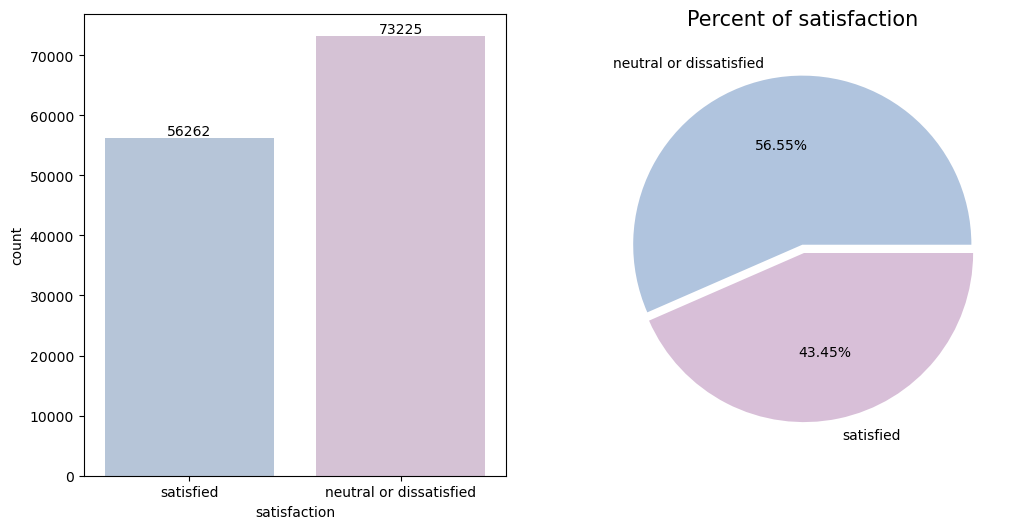

In [114]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors=["LightSteelBlue","Thistle"]
ax1=sns.countplot(x='satisfaction', data=df,palette=colors)
for bars in ax1.containers: 
    ax1.bar_label(bars)

plt.subplot(1, 2, 2)
plt.pie(df['satisfaction'].value_counts(),labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%',colors=colors)
plt.title('Percent of satisfaction', fontsize=15)
plt.show()

- Only 43.45% (56262 in numbers) of the passenegers are satisfied.

##### Plotting for categorical values

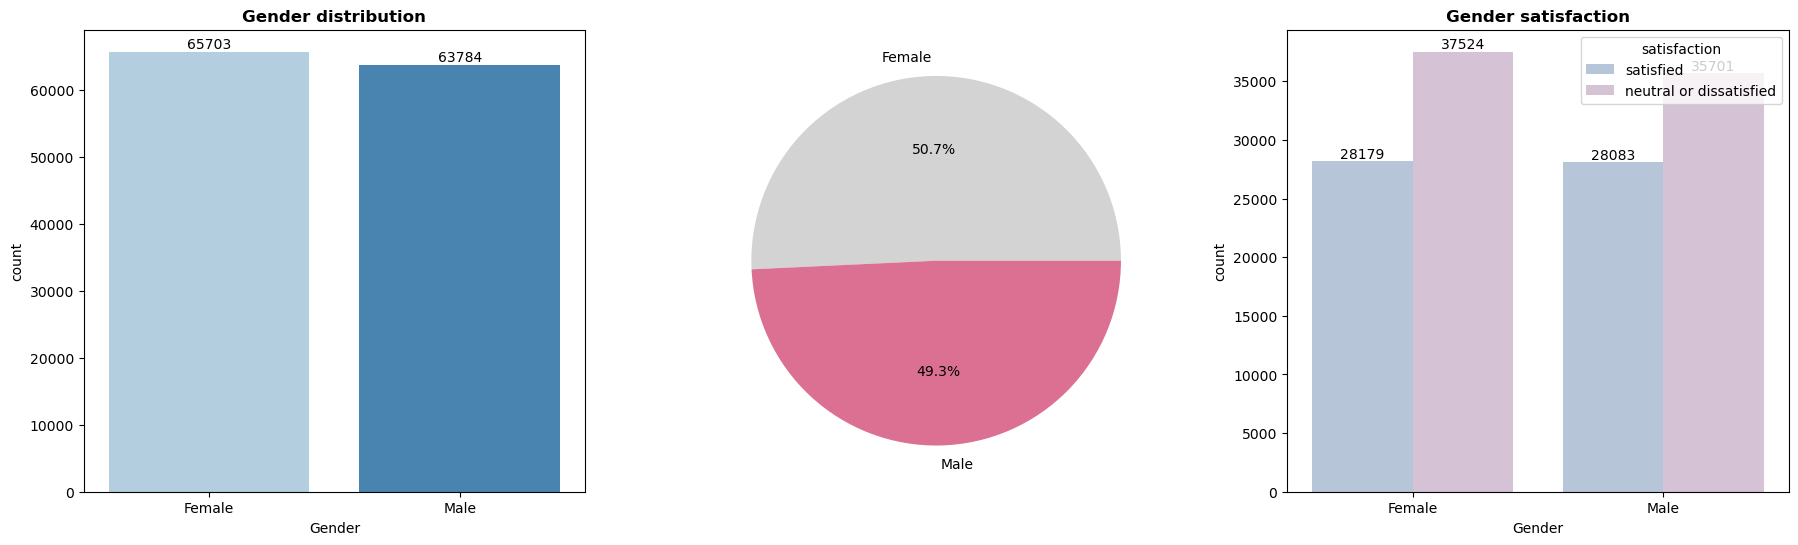

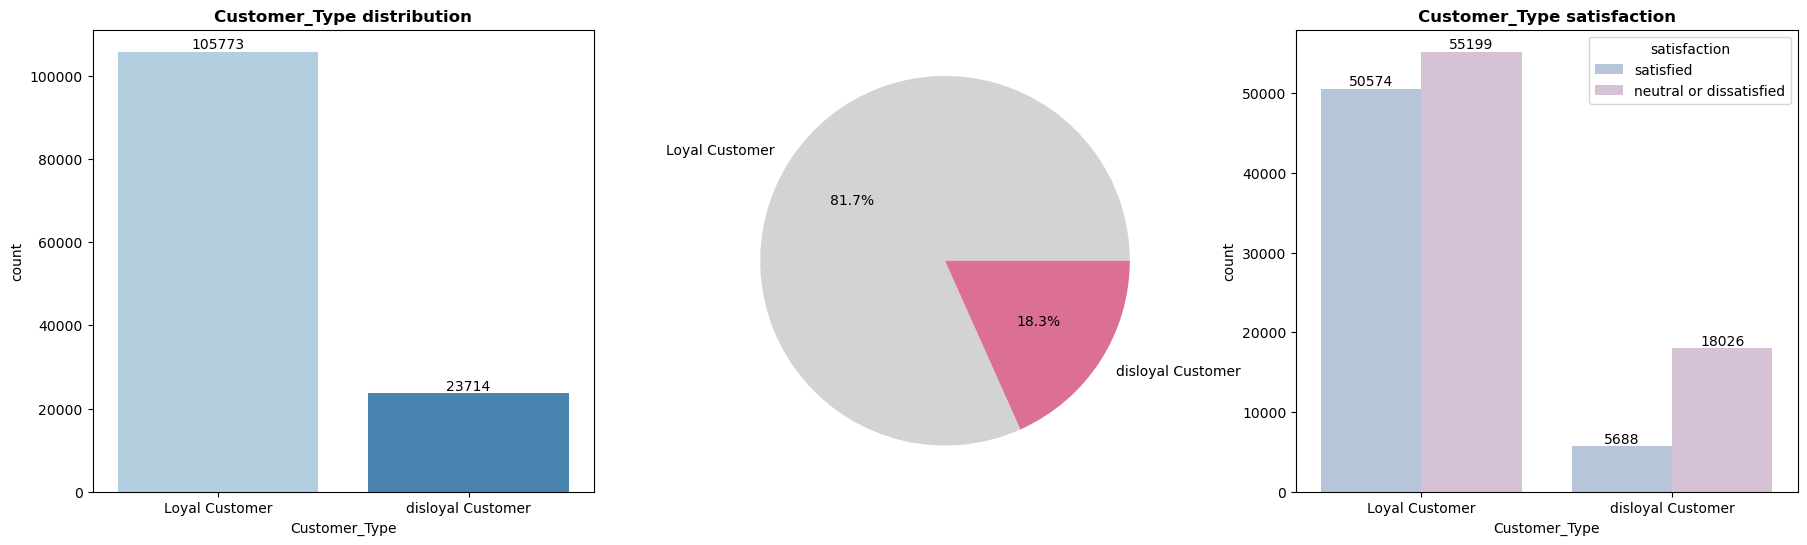

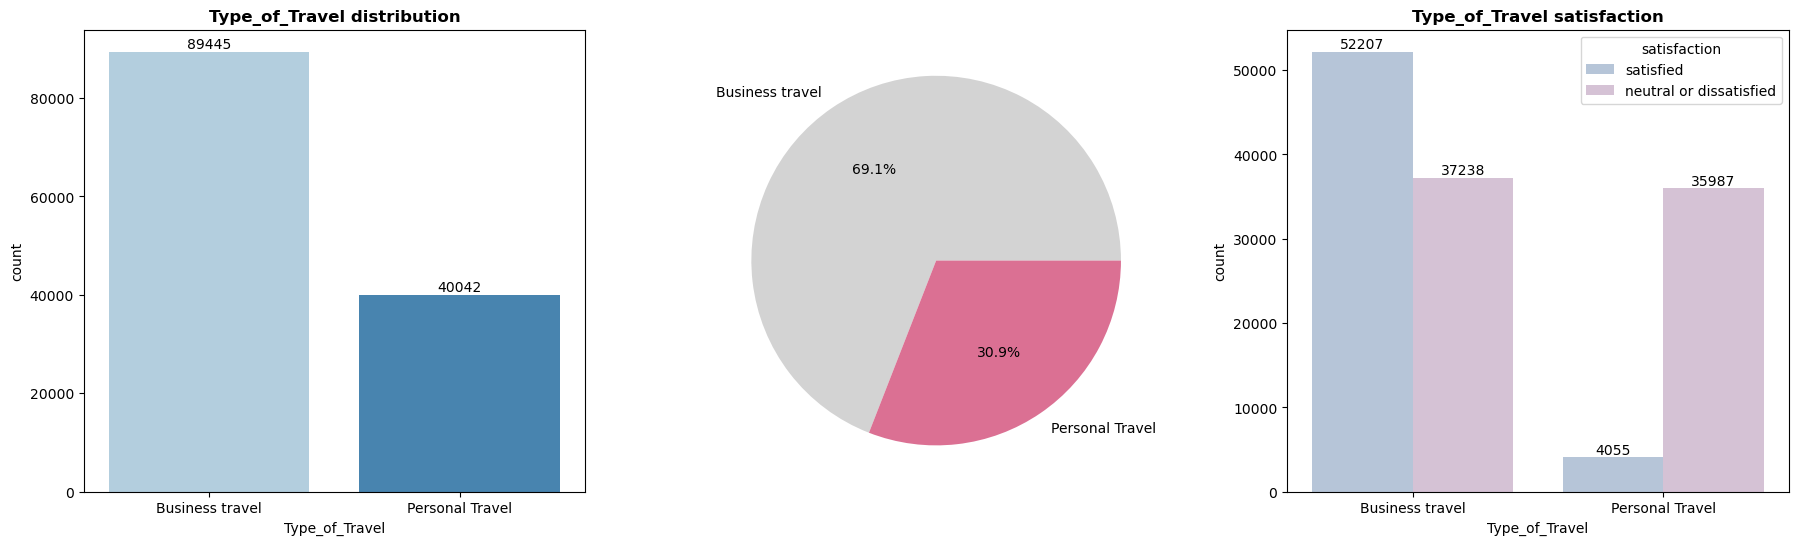

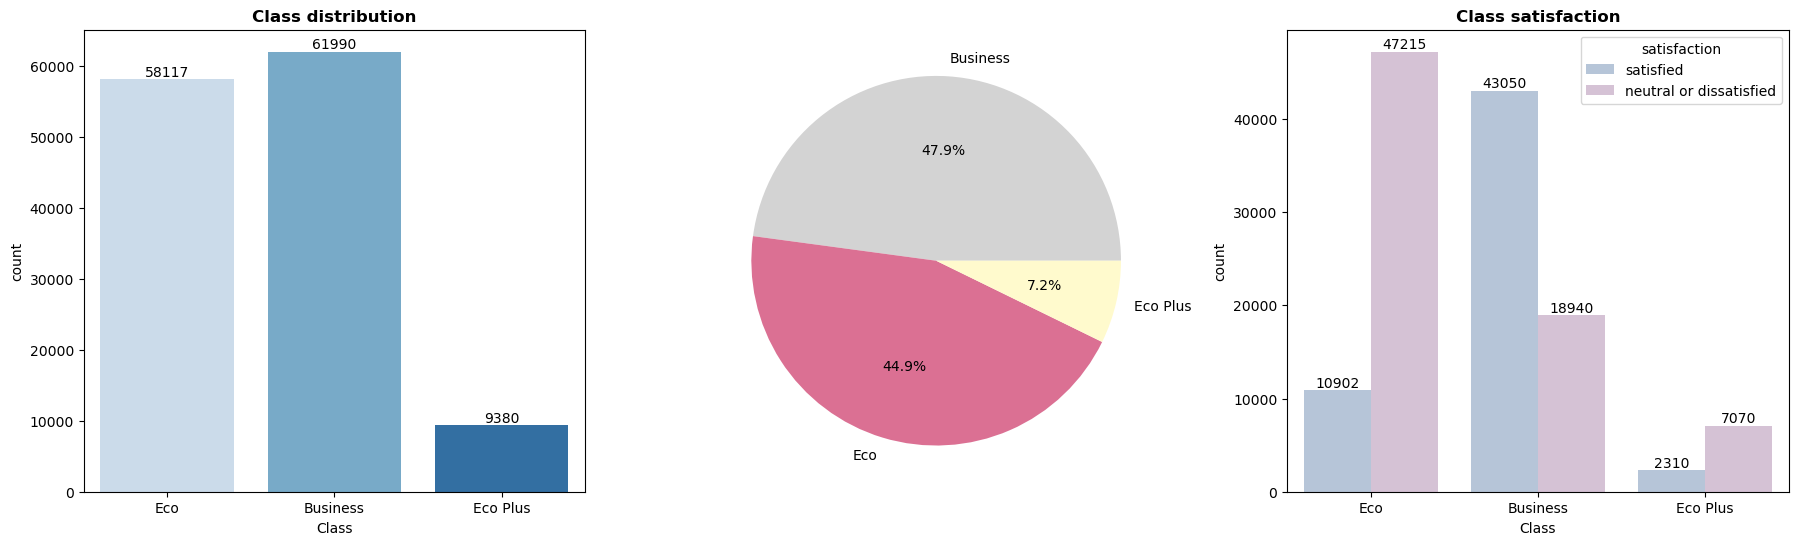

In [115]:
category=['Gender', 'Customer_Type','Type_of_Travel', 'Class']
for i in category:
    plt.figure(figsize=(22,6))
    plt.subplot(1,3,1)
    a=sns.countplot(x=df[i],palette="Blues")
    for bars in a.containers: 
        a.bar_label(bars)
    plt.title(i+" distribution",fontweight='bold', fontsize=12)
    plt.subplot(1,3,2)
    
    pastel_colors = ['Lightgrey','PaleVioletRed','LemonChiffon']
    b=plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%',colors=pastel_colors)
    plt.subplot(1,3,3)
    plt.title(i+" satisfaction",fontweight='bold', fontsize=12)
    
    c=sns.countplot(x=df[i],hue=df.satisfaction, palette=["LightSteelBlue","Thistle"])
    for bars in c.containers: 
        c.bar_label(bars)
    plt.show()

- Gender distribution is fairly equal
- Loyal customers are noteably higher than the others.
- Majority of the population is using the airline for business purposes
- Satisfaction level is higher for passengers travelling business class compared to others.

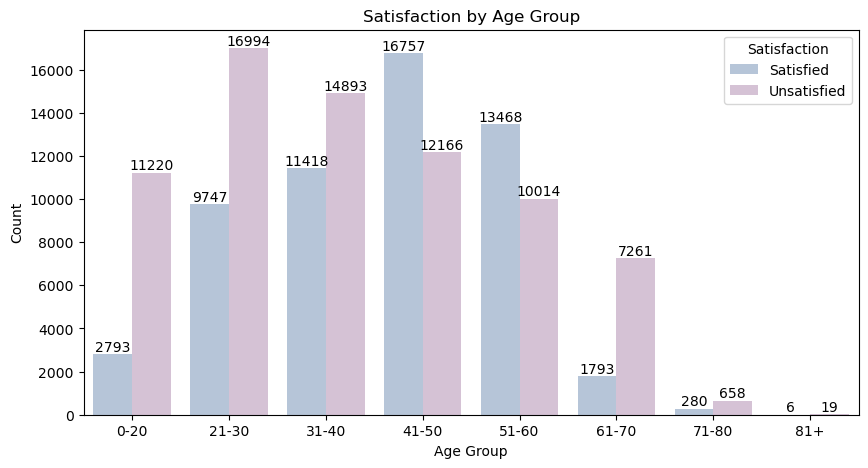

In [116]:
plt.figure(figsize=(10, 5))
d=sns.countplot(data=df, x='Age_Group', hue='satisfaction',palette=["LightSteelBlue","Thistle"])
for bars in d.containers: 
        d.bar_label(bars)
plt.title('Satisfaction by Age Group')
plt.xlabel('Age Group') 
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Satisfaction", loc="upper right", labels=["Satisfied", "Unsatisfied"])
plt.show()

- Most passengers are of age group 41-50

##### Plotting for numerical values

Satisfaction based on ratings from 0 to 5

0 being least satisfied and 5 being the most satisfied.

In [117]:
def num_values(variable):
    
    var=df[variable]
    var_Value=var.value_counts()
    
    #visualize
    colors = ['Lightgrey','PaleVioletRed','LightSeaGreen','PapayaWhip','Lightcoral','Lightskyblue']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    f= plt.bar(var_Value.index,var_Value.values,color=colors)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.subplot(1,2,2)
    g=sns.countplot(x=df[x],hue=df.satisfaction, palette=["LightSteelBlue","Thistle"])
    for bars in g.containers: 
        g.bar_label(bars)
    plt.show()
    print(f"{variable}: \n {var_Value}")

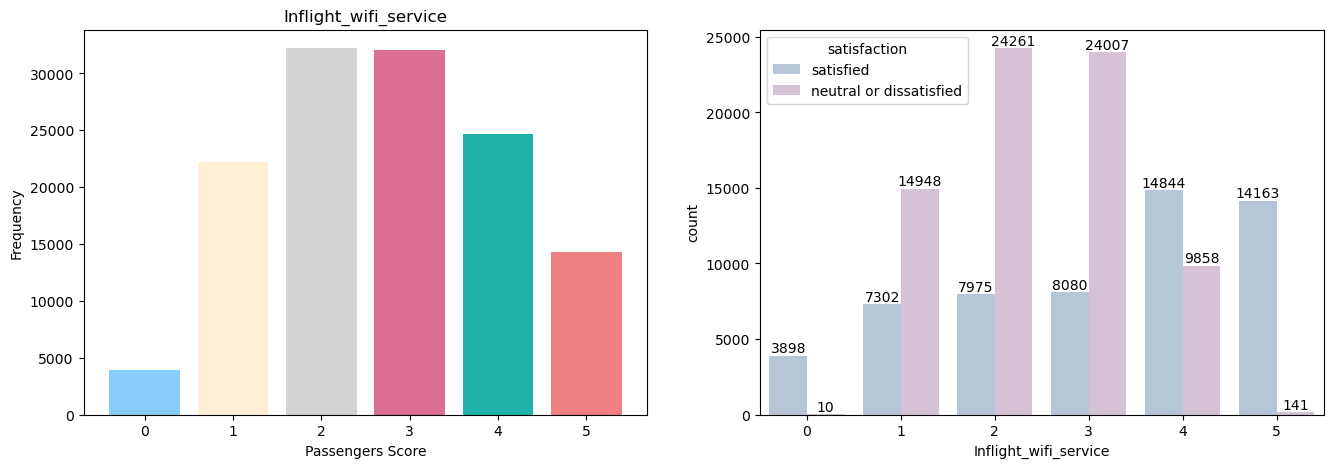

Inflight_wifi_service: 
 2    32236
3    32087
4    24702
1    22250
5    14304
0     3908
Name: Inflight_wifi_service, dtype: int64


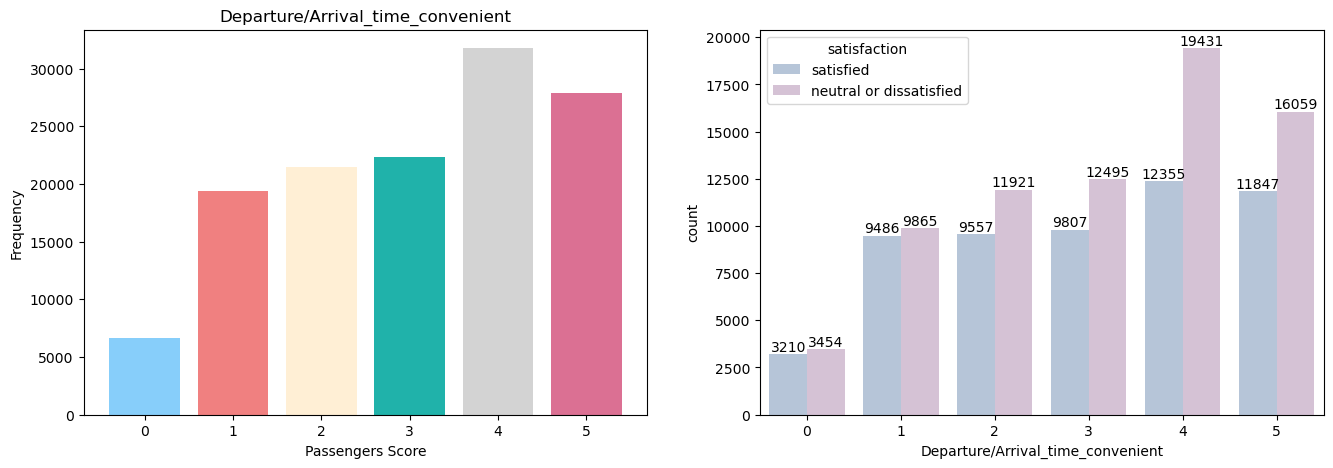

Departure/Arrival_time_convenient: 
 4    31786
5    27906
3    22302
2    21478
1    19351
0     6664
Name: Departure/Arrival_time_convenient, dtype: int64


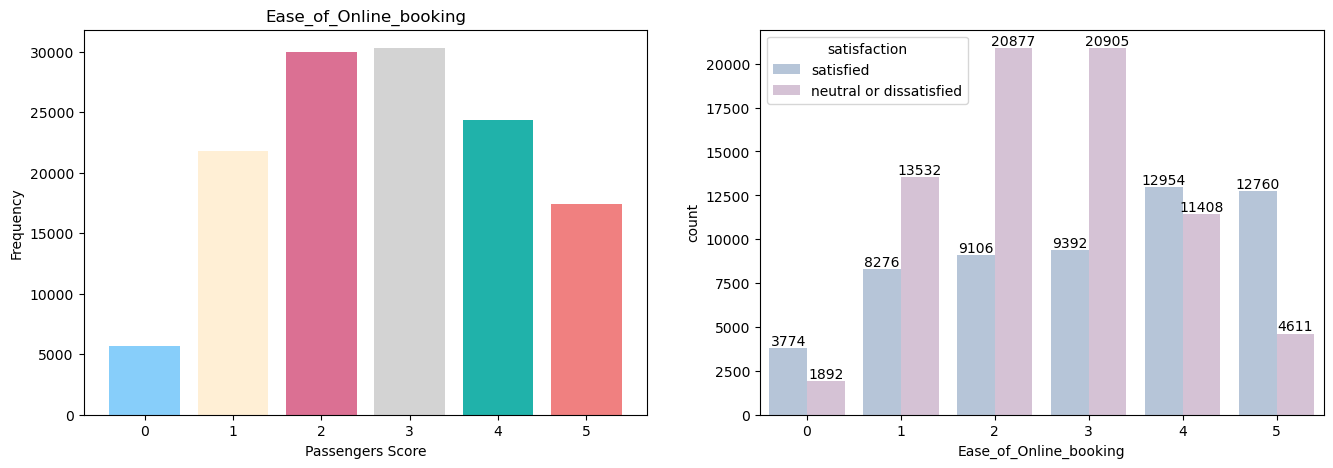

Ease_of_Online_booking: 
 3    30297
2    29983
4    24362
1    21808
5    17371
0     5666
Name: Ease_of_Online_booking, dtype: int64


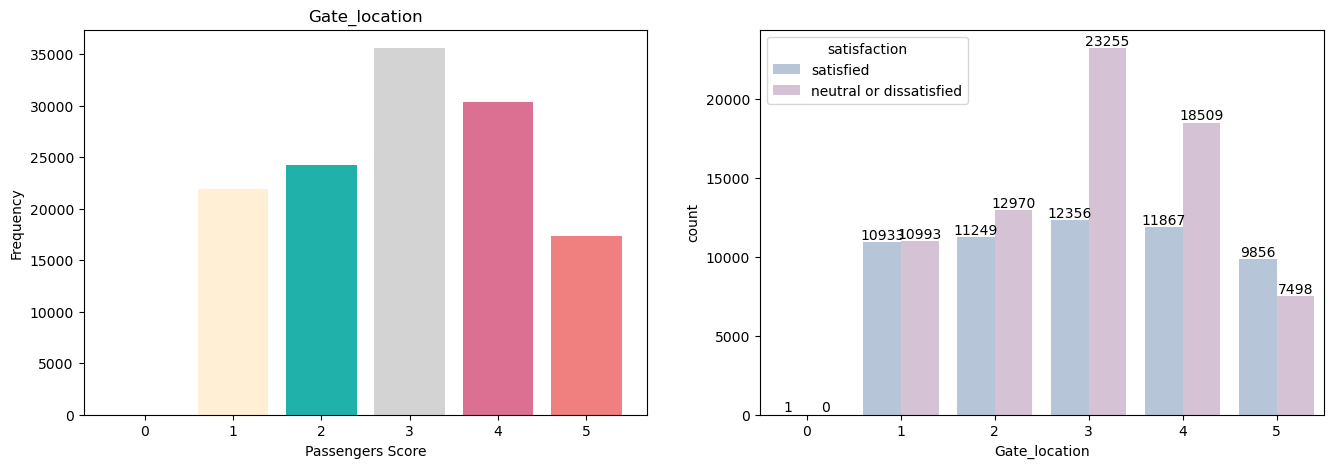

Gate_location: 
 3    35611
4    30376
2    24219
1    21926
5    17354
0        1
Name: Gate_location, dtype: int64


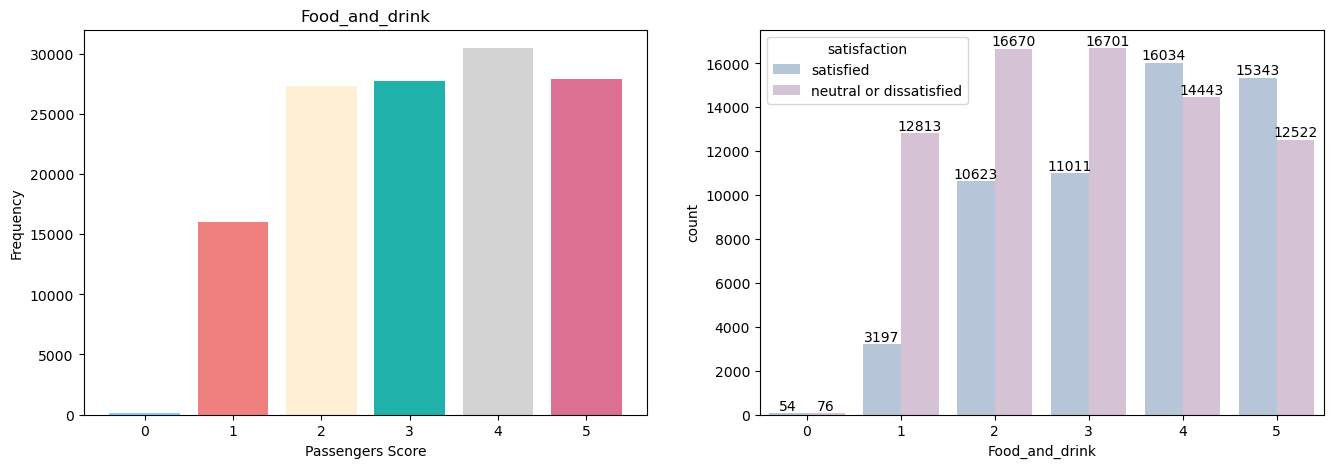

Food_and_drink: 
 4    30477
5    27865
3    27712
2    27293
1    16010
0      130
Name: Food_and_drink, dtype: int64


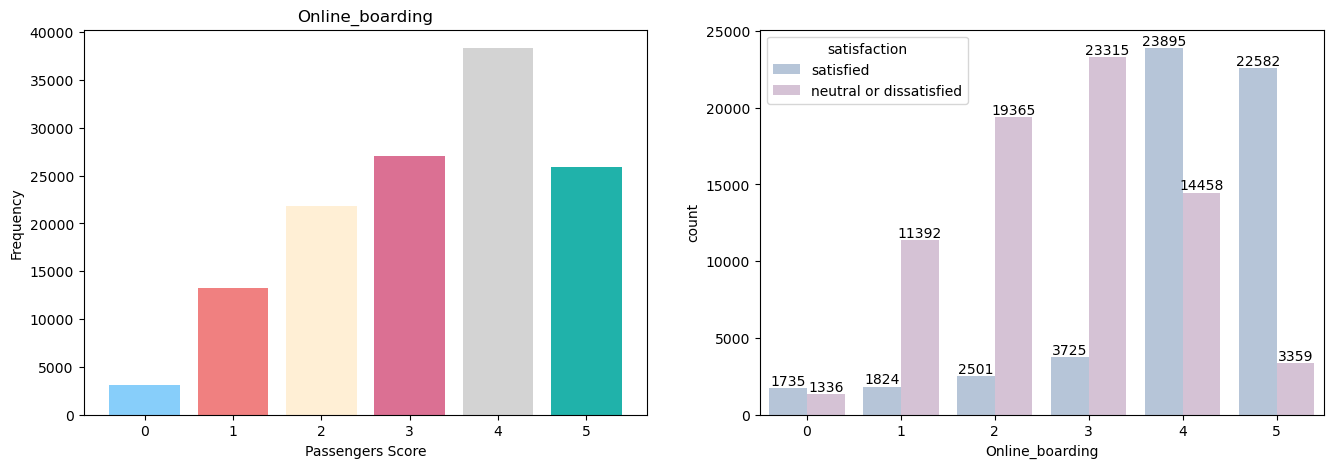

Online_boarding: 
 4    38353
3    27040
5    25941
2    21866
1    13216
0     3071
Name: Online_boarding, dtype: int64


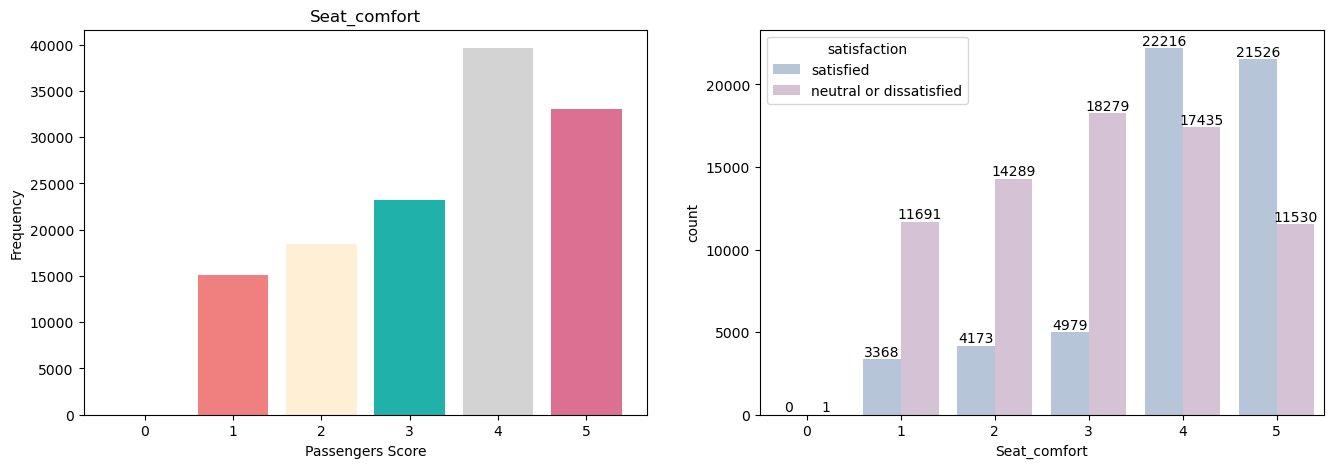

Seat_comfort: 
 4    39651
5    33056
3    23258
2    18462
1    15059
0        1
Name: Seat_comfort, dtype: int64


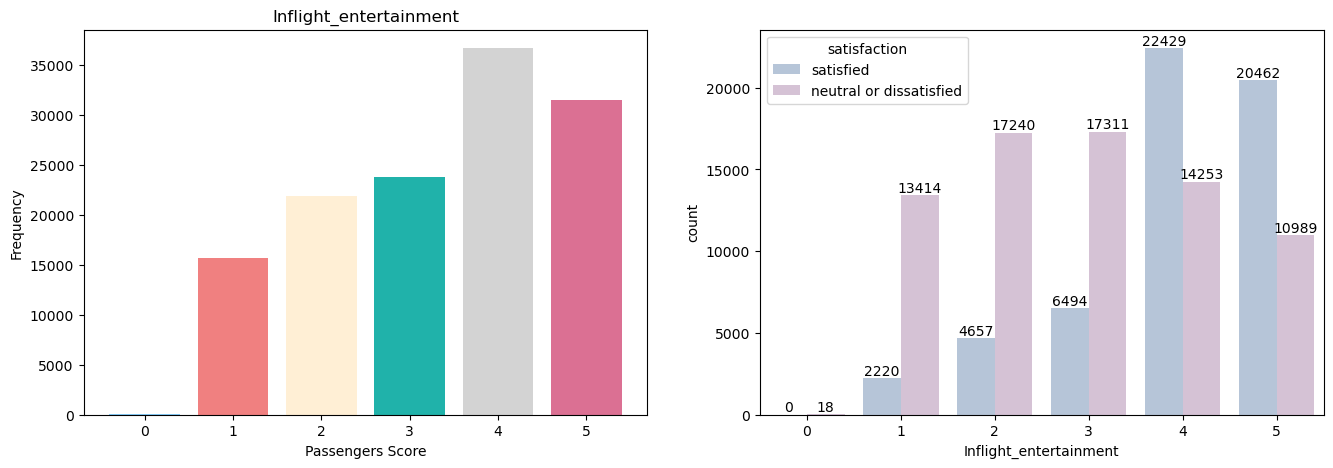

Inflight_entertainment: 
 4    36682
5    31451
3    23805
2    21897
1    15634
0       18
Name: Inflight_entertainment, dtype: int64


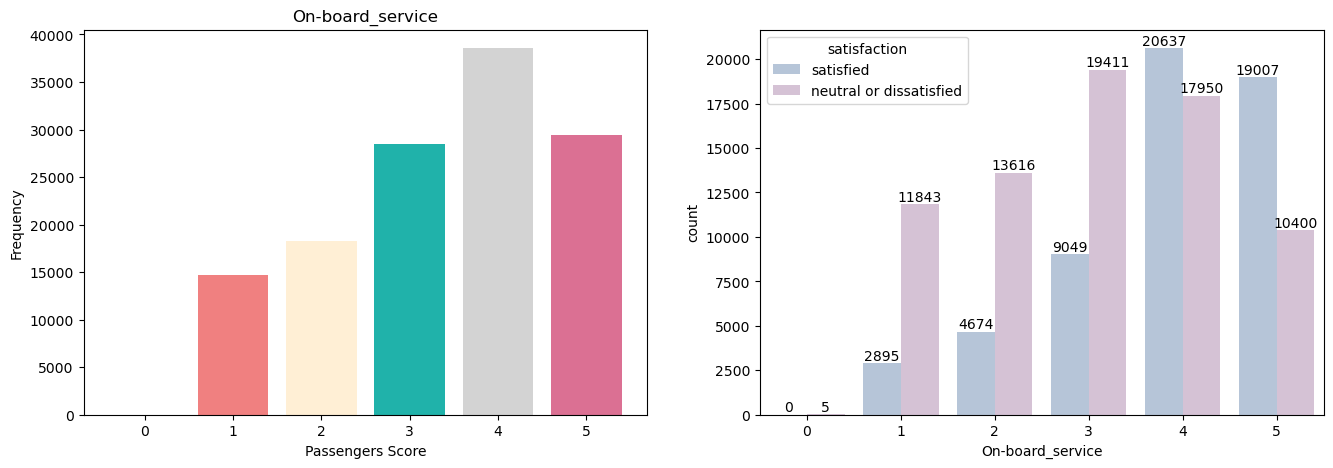

On-board_service: 
 4    38587
5    29407
3    28460
2    18290
1    14738
0        5
Name: On-board_service, dtype: int64


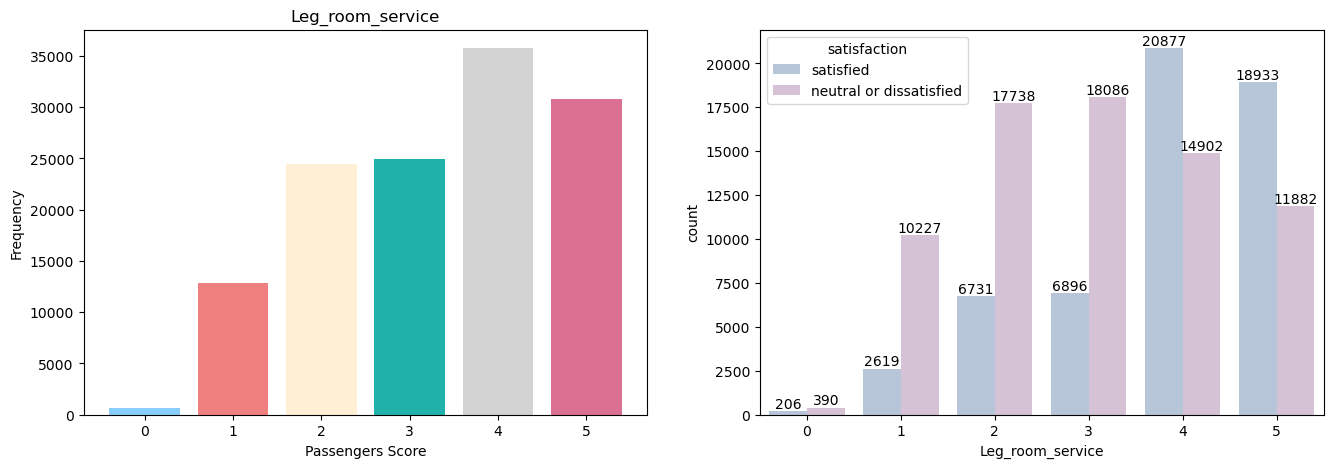

Leg_room_service: 
 4    35779
5    30815
3    24982
2    24469
1    12846
0      596
Name: Leg_room_service, dtype: int64


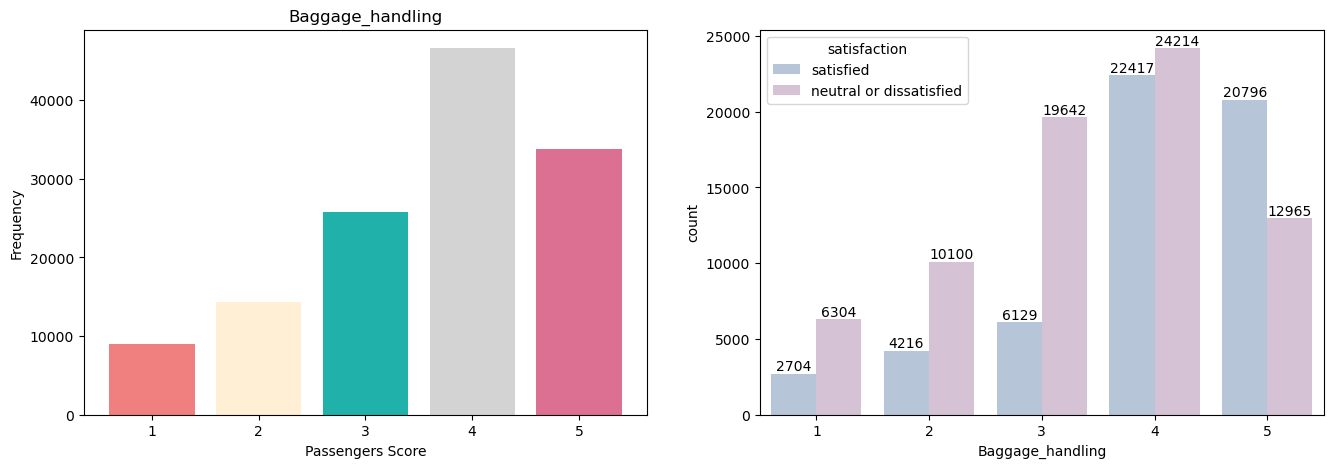

Baggage_handling: 
 4    46631
5    33761
3    25771
2    14316
1     9008
Name: Baggage_handling, dtype: int64


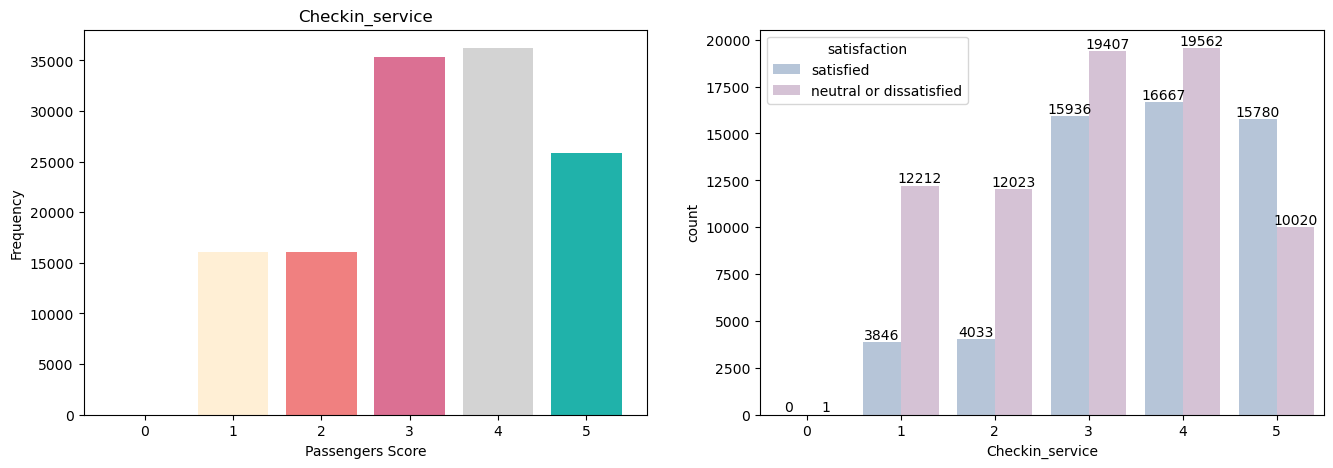

Checkin_service: 
 4    36229
3    35343
5    25800
1    16058
2    16056
0        1
Name: Checkin_service, dtype: int64


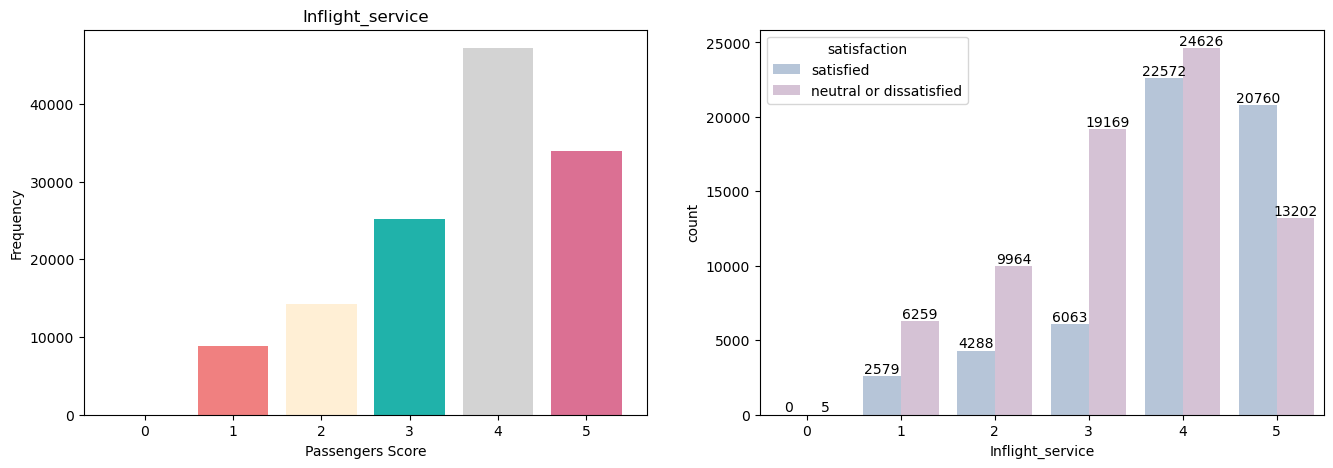

Inflight_service: 
 4    47198
5    33962
3    25232
2    14252
1     8838
0        5
Name: Inflight_service, dtype: int64


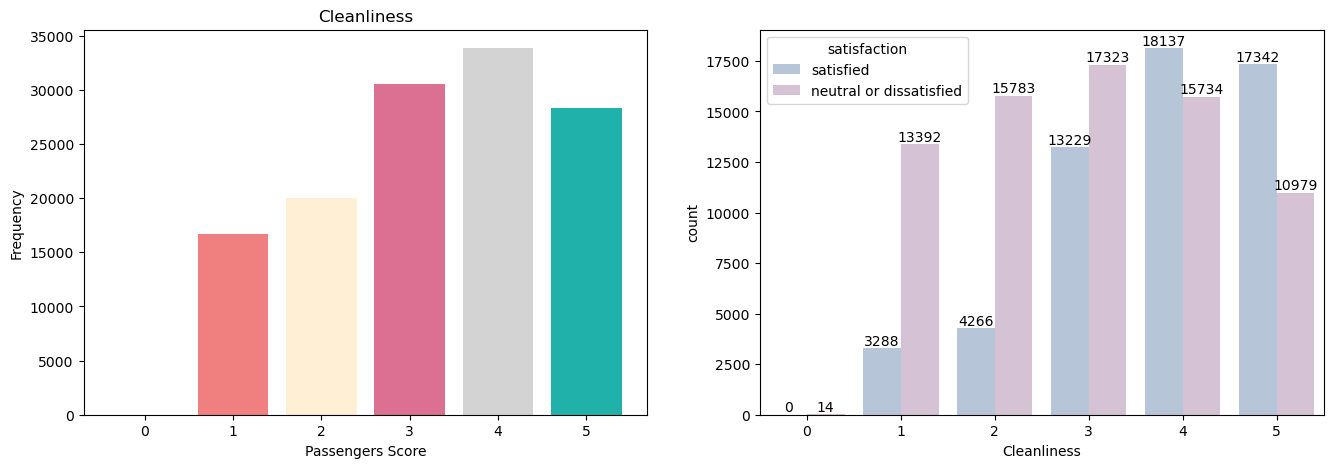

Cleanliness: 
 4    33871
3    30552
5    28321
2    20049
1    16680
0       14
Name: Cleanliness, dtype: int64


In [118]:
category1=["Inflight_wifi_service", "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location",
           "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", "On-board_service", 
           "Leg_room_service", "Baggage_handling", "Checkin_service", "Inflight_service", "Cleanliness"]
for x in category1:
    num_values(x)

- Overall, the majority of passengers express satisfaction with Inflight WiFi service, with a notable 64,323 respondents giving ratings of 3 or higher.
- Departure/Arrival time convenience receives positive feedback, as 59,692 respondents rate it 3 or higher, indicating a generally favorable sentiment.
- Ease of Online Booking sees a balanced distribution, but improvements could be considered, with 30,297 passengers giving it a rating of 3.
- Gate location satisfaction is generally high, with 65,987 respondents providing ratings of 3 or higher.
- Food and drink options receive mixed feedback, with 58,054 passengers giving ratings of 3 or higher, suggesting room for enhancement in the variety of offerings.
- Online Boarding and Seat Comfort receive positive reviews, with 38,353 and 39,651 respondents giving ratings of 4 or higher, respectively.
- Baggage Handling stands out with a high satisfaction level, as 80,392 respondents rate it 4 or higher, reflecting a commendable performance in this aspect of service.

### 4.*Outliers*

In [119]:
numerical_features = df.select_dtypes(exclude=['object']).drop(["Age_Group"],axis=1).copy()
numerical_features.columns

Index(['Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

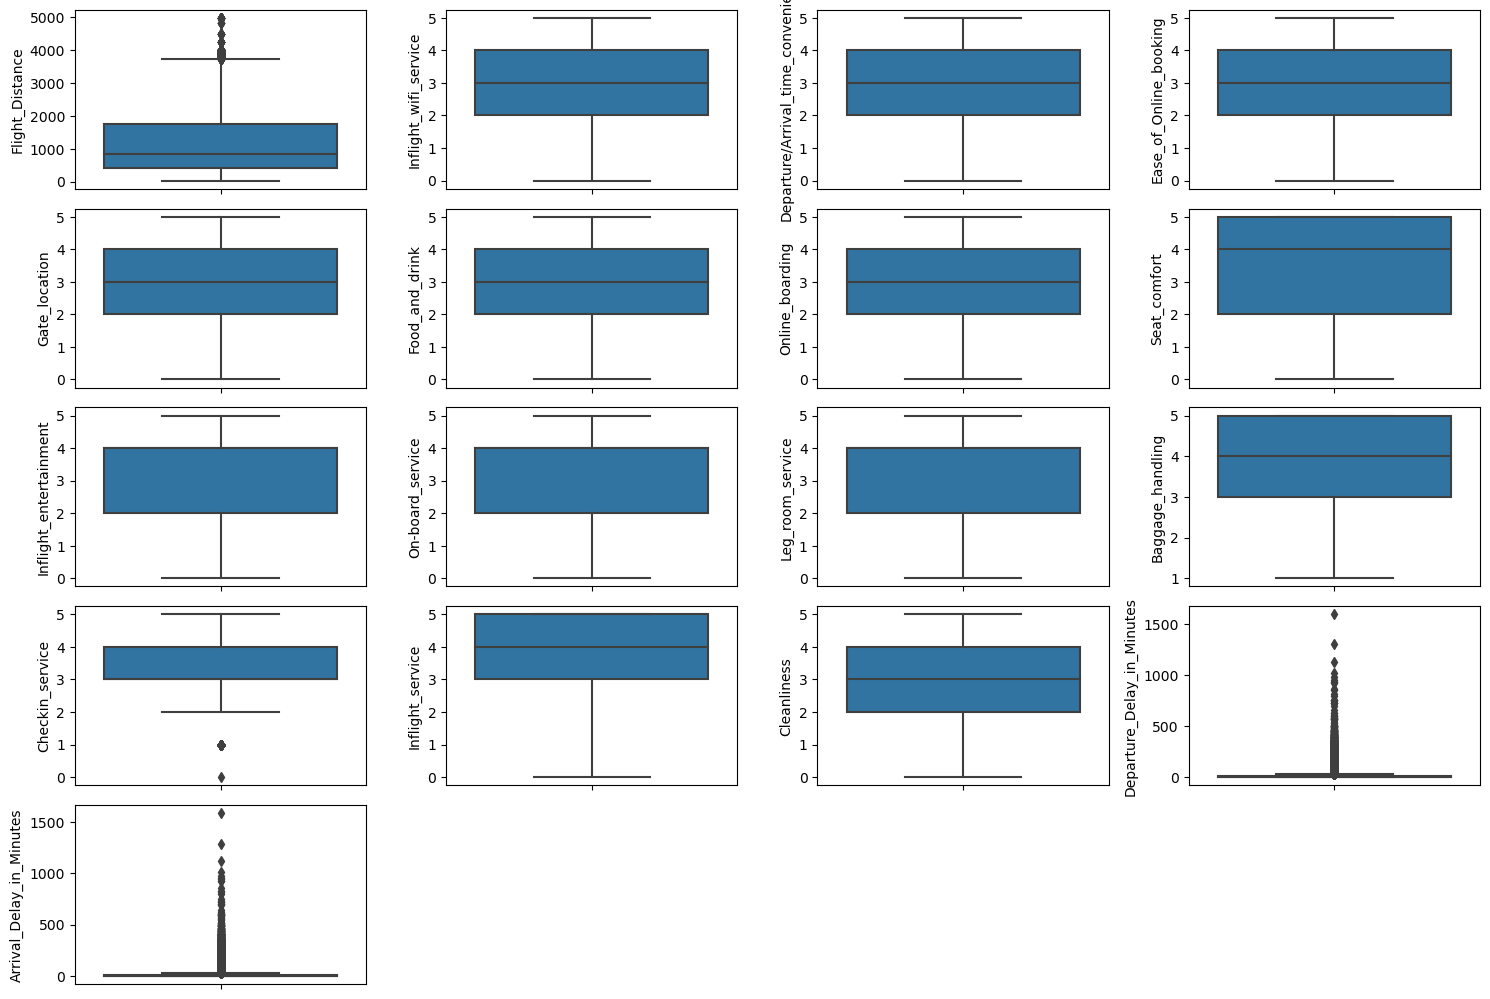

In [120]:
fig = plt.figure(figsize=(15,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [121]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c],25)
        Q3=np.percentile(df[c],75)
        IQR= Q3-Q1
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [122]:
df.loc[detect_outliers(df,['Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'])]

,Gender,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Age_Group
145,Female,Loyal Customer,Business travel,Business,3769,3,1,5,1,1,...,4,3,4,1,2,1,180,178.0,neutral or dissatisfied,51-60
853,Female,Loyal Customer,Business travel,Business,3894,1,1,1,1,3,...,5,5,3,1,5,2,0,50.0,satisfied,51-60
946,Male,Loyal Customer,Business travel,Business,3799,2,2,5,2,2,...,5,5,5,3,5,3,81,96.0,satisfied,31-40
1279,Female,Loyal Customer,Business travel,Business,3880,3,3,3,3,5,...,2,5,1,5,2,5,146,171.0,satisfied,31-40
1358,Female,Loyal Customer,Business travel,Business,3801,4,4,2,4,5,...,4,4,4,3,4,2,100,94.0,neutral or dissatisfied,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129665,Male,Loyal Customer,Personal Travel,Eco,408,3,2,3,2,2,...,3,2,2,1,1,2,83,75.0,neutral or dissatisfied,21-30
129670,Male,Loyal Customer,Business travel,Eco,1197,1,2,2,2,1,...,3,3,3,1,1,1,260,263.0,neutral or dissatisfied,41-50
129702,Female,disloyal Customer,Business travel,Eco,1514,3,4,4,3,3,...,3,5,2,1,2,3,58,63.0,neutral or dissatisfied,31-40
129845,Male,Loyal Customer,Personal Travel,Eco,895,4,5,4,3,4,...,5,4,5,1,3,1,212,206.0,neutral or dissatisfied,0-20


In [123]:
df = df.drop(detect_outliers(df,['Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes']),axis = 0).reset_index(drop = True)

In [124]:
df.shape

(127141, 23)

In [125]:
df.head()

,Gender,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Age_Group
0,Female,Loyal Customer,Business travel,Eco,160,5,4,3,4,3,...,5,5,5,2,5,5,50,44.0,satisfied,51-60
1,Female,Loyal Customer,Business travel,Business,2863,1,1,3,1,5,...,4,4,4,3,4,5,0,0.0,satisfied,31-40
2,Male,disloyal Customer,Business travel,Eco,192,2,0,2,4,2,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0-20
3,Male,Loyal Customer,Business travel,Business,3377,0,0,0,2,3,...,1,1,1,3,1,4,0,6.0,satisfied,41-50
4,Female,Loyal Customer,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,4,2,4,0,20.0,satisfied,41-50


## 5.Conversion of categorical to numerical

In [126]:
df["satisfaction"] = np.where(df.satisfaction == "satisfied", 1,0)

In [127]:
df.head(5)

,Gender,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Age_Group
0,Female,Loyal Customer,Business travel,Eco,160,5,4,3,4,3,...,5,5,5,2,5,5,50,44.0,1,51-60
1,Female,Loyal Customer,Business travel,Business,2863,1,1,3,1,5,...,4,4,4,3,4,5,0,0.0,1,31-40
2,Male,disloyal Customer,Business travel,Eco,192,2,0,2,4,2,...,4,1,3,2,2,2,0,0.0,0,0-20
3,Male,Loyal Customer,Business travel,Business,3377,0,0,0,2,3,...,1,1,1,3,1,4,0,6.0,1,41-50
4,Female,Loyal Customer,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,4,2,4,0,20.0,1,41-50


In [128]:
df["Customer_Type"]=LabelEncoder().fit_transform(df["Customer_Type"]) 
df["Type_of_Travel"] = LabelEncoder().fit_transform(df["Type_of_Travel"]) 
df["Class"] = LabelEncoder().fit_transform(df["Class"])
df.head(10)

,Gender,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Age_Group
0,Female,0,0,1,160,5,4,3,4,3,...,5,5,5,2,5,5,50,44.0,1,51-60
1,Female,0,0,0,2863,1,1,3,1,5,...,4,4,4,3,4,5,0,0.0,1,31-40
2,Male,1,0,1,192,2,0,2,4,2,...,4,1,3,2,2,2,0,0.0,0,0-20
3,Male,0,0,0,3377,0,0,0,2,3,...,1,1,1,3,1,4,0,6.0,1,41-50
4,Female,0,0,1,1182,2,3,4,3,4,...,2,2,2,4,2,4,0,20.0,1,41-50
5,Male,0,0,1,311,3,3,3,3,5,...,4,3,1,1,2,5,0,0.0,1,0-20
6,Female,0,0,0,3987,5,5,5,5,3,...,5,5,5,4,5,3,0,0.0,1,71-80
7,Female,0,0,0,2556,2,2,2,2,4,...,4,4,4,5,4,3,77,65.0,1,41-50
8,Male,0,0,1,556,5,2,2,2,5,...,2,2,5,3,3,5,1,0.0,1,41-50
9,Female,0,0,0,1744,2,2,2,2,3,...,4,4,4,5,4,4,28,14.0,1,41-50


In [129]:
df2=pd.get_dummies(df, columns=["Age_Group"]) 
df2.head()

,Gender,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Arrival_Delay_in_Minutes,satisfaction,Age_Group_0-20,Age_Group_21-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61-70,Age_Group_71-80,Age_Group_81+
0,Female,0,0,1,160,5,4,3,4,3,...,44.0,1,0,0,0,0,1,0,0,0
1,Female,0,0,0,2863,1,1,3,1,5,...,0.0,1,0,0,1,0,0,0,0,0
2,Male,1,0,1,192,2,0,2,4,2,...,0.0,0,1,0,0,0,0,0,0,0
3,Male,0,0,0,3377,0,0,0,2,3,...,6.0,1,0,0,0,1,0,0,0,0
4,Female,0,0,1,1182,2,3,4,3,4,...,20.0,1,0,0,0,1,0,0,0,0


In [130]:
df2=pd.get_dummies(df,columns=["Gender"])
df3=pd.get_dummies(df2, columns=["Age_Group"])
df3.head()

,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Gender_Female,Gender_Male,Age_Group_0-20,Age_Group_21-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61-70,Age_Group_71-80,Age_Group_81+
0,0,0,1,160,5,4,3,4,3,4,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,2863,1,1,3,1,5,4,...,1,0,0,0,1,0,0,0,0,0
2,1,0,1,192,2,0,2,4,2,2,...,0,1,1,0,0,0,0,0,0,0
3,0,0,0,3377,0,0,0,2,3,4,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,1182,2,3,4,3,4,1,...,1,0,0,0,0,1,0,0,0,0


### 6.*Correlation analysis*

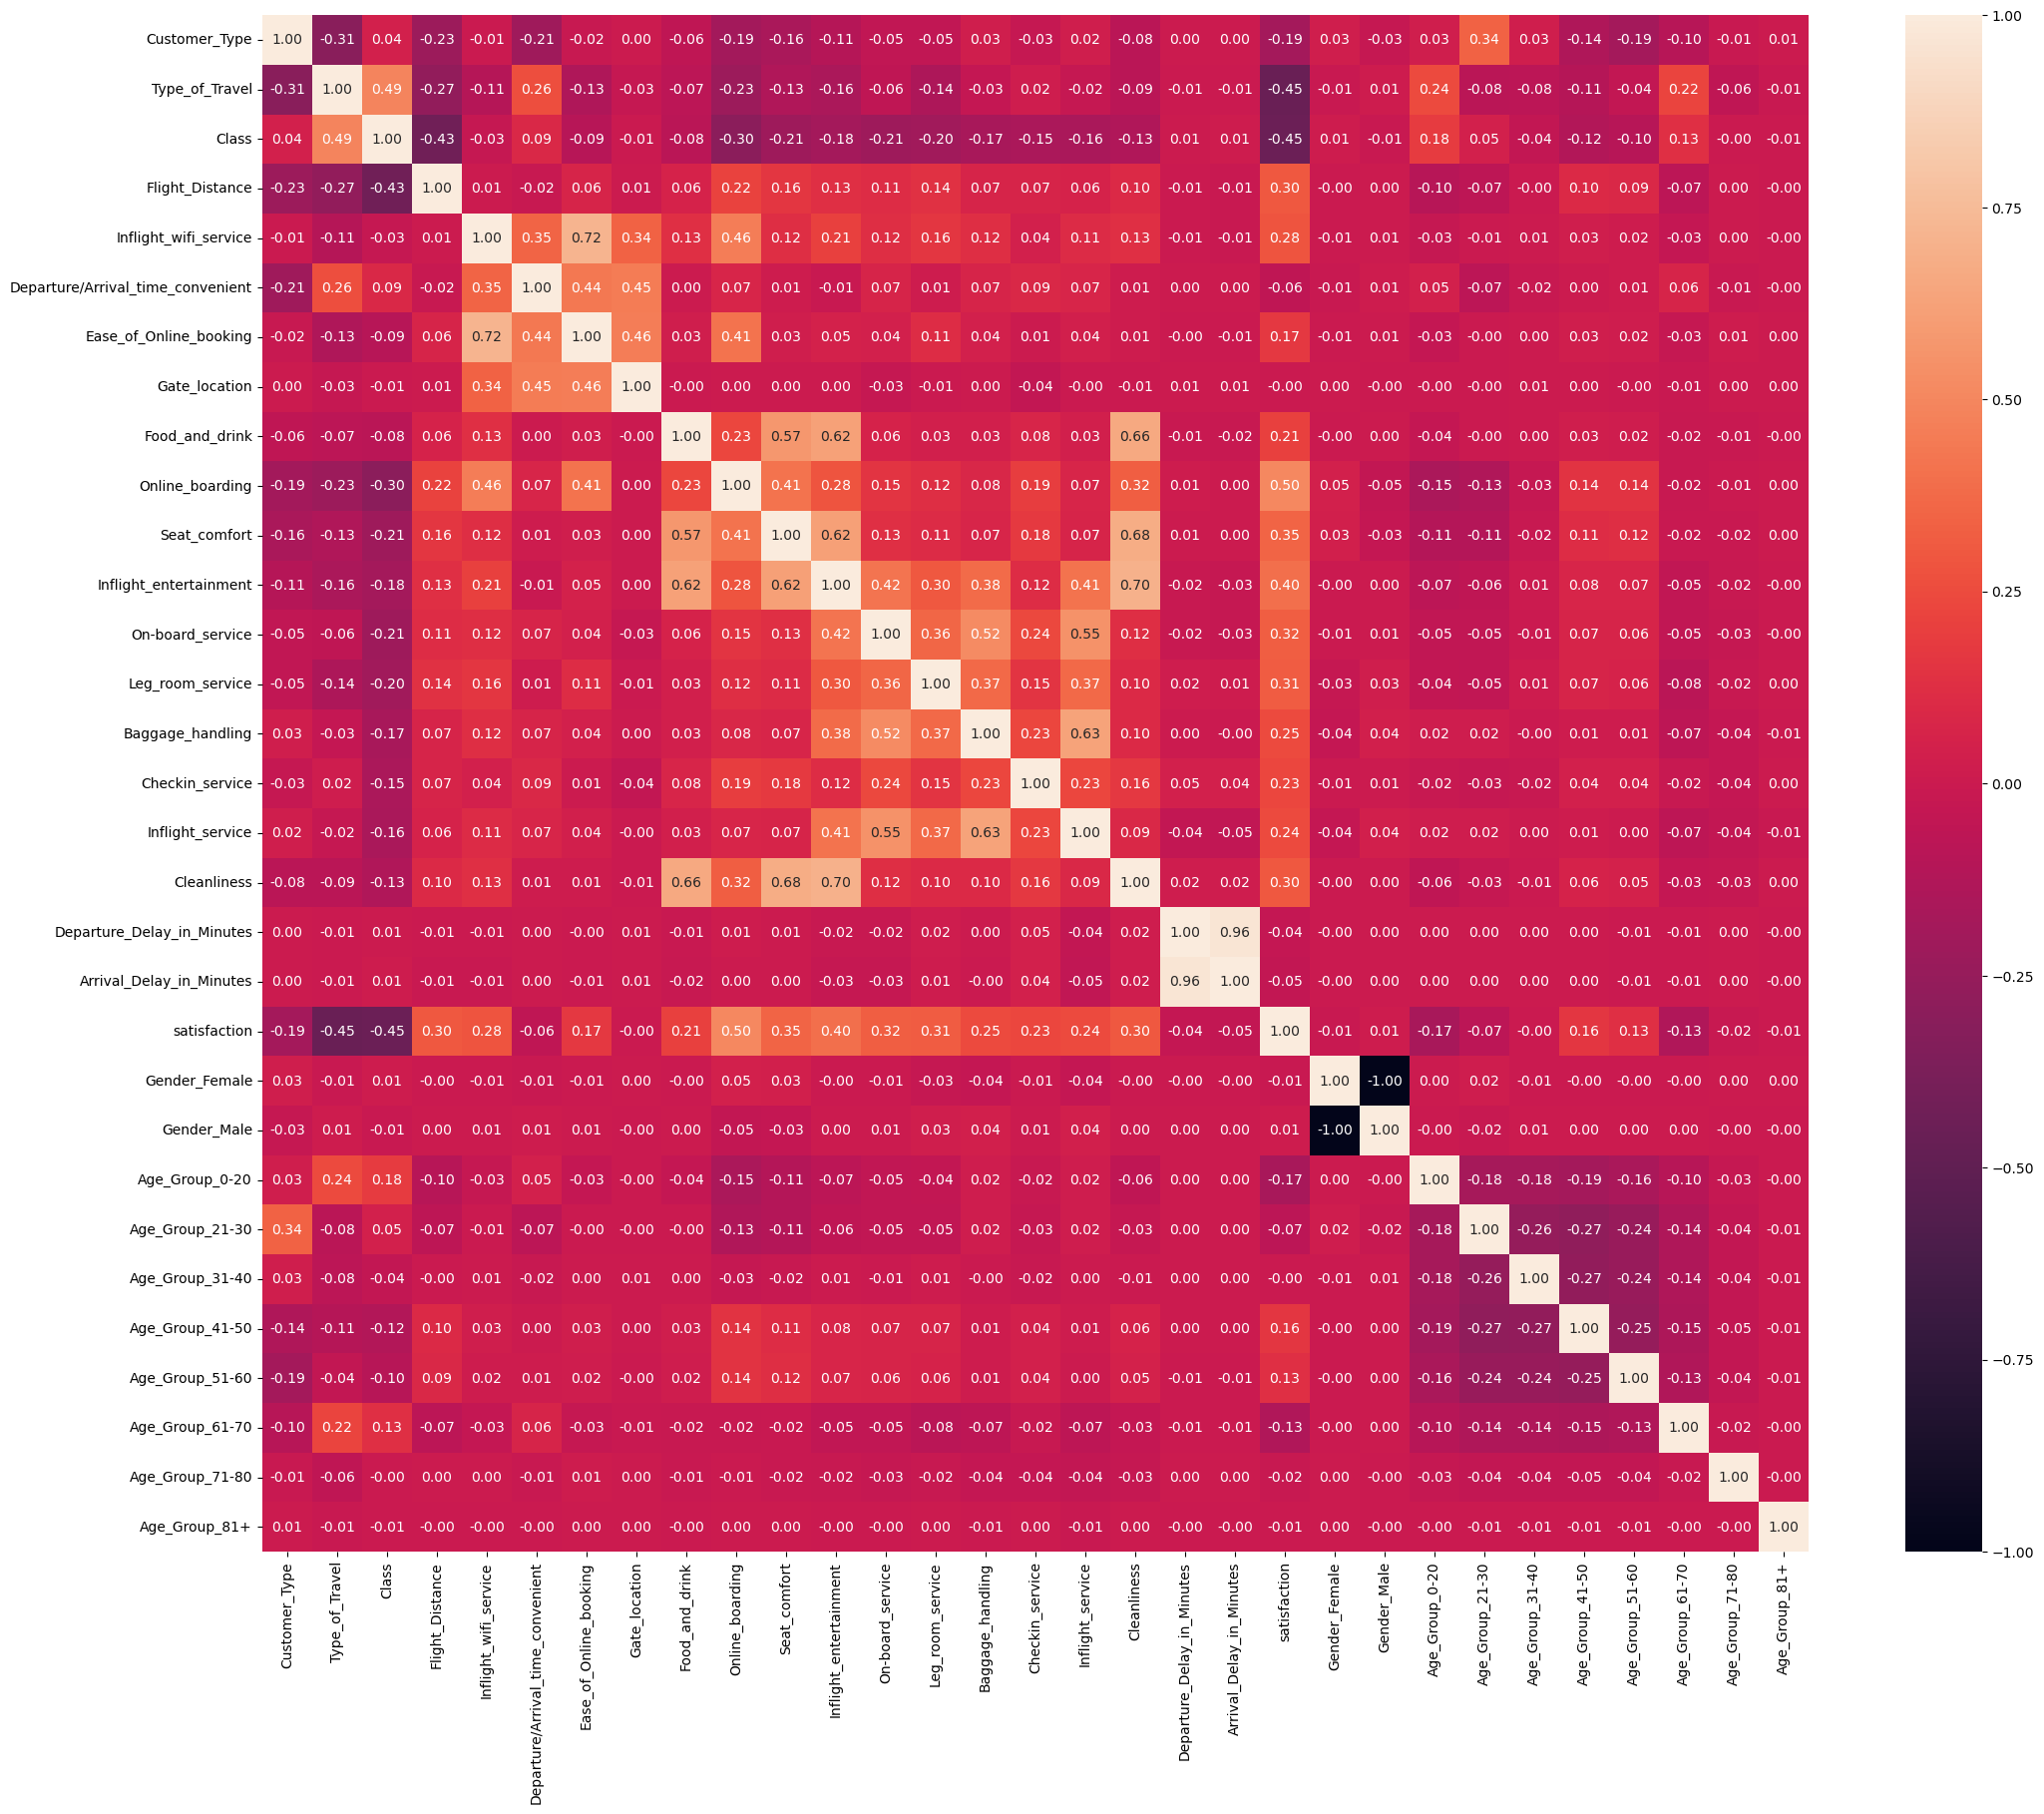

In [131]:
plt.figure(figsize=(25,20))
sns.heatmap(df3.corr(),annot=True,fmt=".2f")
plt.show()

### 7.Model Building

In [132]:
x=df3.drop("satisfaction", axis=1)            
x.head()

,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Gender_Female,Gender_Male,Age_Group_0-20,Age_Group_21-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61-70,Age_Group_71-80,Age_Group_81+
0,0,0,1,160,5,4,3,4,3,4,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,2863,1,1,3,1,5,4,...,1,0,0,0,1,0,0,0,0,0
2,1,0,1,192,2,0,2,4,2,2,...,0,1,1,0,0,0,0,0,0,0
3,0,0,0,3377,0,0,0,2,3,4,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,1182,2,3,4,3,4,1,...,1,0,0,0,0,1,0,0,0,0


In [133]:
y=df3["satisfaction"]
y.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int32

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [135]:
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)

(88998, 30) (88998,)
(38143, 30) (38143,)


##### Decision Tree Classifier

In [136]:
dt_model = DecisionTreeClassifier(criterion = "gini",random_state=100,max_depth=3)
dt_model.fit(x_train,y_train)
dt_y_test_pred = dt_model.predict(x_test)

In [137]:
dt_y_test_pred

array([0, 1, 1, ..., 1, 0, 0])

In [138]:
print(classification_report(y_test, dt_y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     21527
           1       0.85      0.91      0.88     16616

    accuracy                           0.89     38143
   macro avg       0.89      0.89      0.89     38143
weighted avg       0.89      0.89      0.89     38143



In [139]:
confusion_matrix(y_test,dt_y_test_pred)

array([[18790,  2737],
       [ 1513, 15103]], dtype=int64)

##### Random forest Classifier

In [140]:
rf_model=RandomForestClassifier(n_estimators=100, criterion="gini",max_depth=4, random_state=100) 
rf_model.fit(x_train, y_train)
rf_y_test_pred=rf_model.predict(x_test)

In [141]:
print(classification_report(y_test, rf_y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     21527
           1       0.92      0.87      0.89     16616

    accuracy                           0.91     38143
   macro avg       0.91      0.90      0.91     38143
weighted avg       0.91      0.91      0.91     38143



In [142]:
print(confusion_matrix(y_test, rf_y_test_pred))


[[20330  1197]
 [ 2238 14378]]


##### Gradient Boosting 

In [143]:
gb_model= GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.05,min_samples_split=2, min_samples_leaf=1)
gb_model.fit(x_train, y_train) 
gb_y_test_pred=gb_model.predict(x_test)

In [144]:
print(classification_report(y_test, gb_y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     21527
           1       0.95      0.92      0.93     16616

    accuracy                           0.94     38143
   macro avg       0.94      0.94      0.94     38143
weighted avg       0.94      0.94      0.94     38143



In [145]:
print(confusion_matrix(y_test, gb_y_test_pred)) 

[[20663   864]
 [ 1342 15274]]


In [146]:
import pickle 
filename="model.sav"
pickle.dump(gb_model, open(filename, "wb"))

load_model=pickle.load(open(filename, "rb"))

load_model.score(x_test, y_test) 

0.9421650106179378

## CONFUSION MATRIX

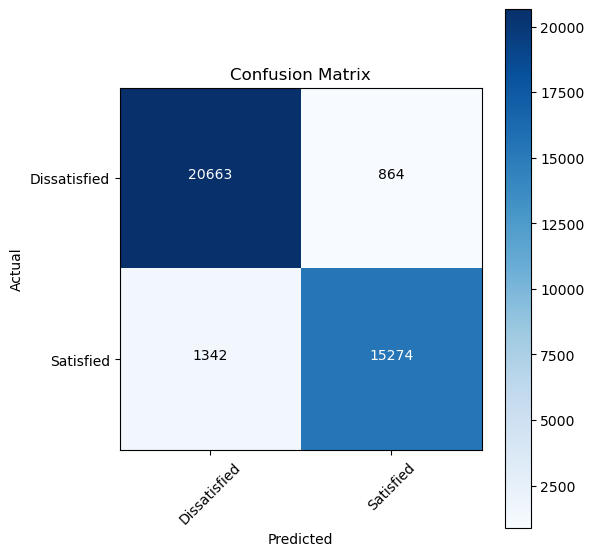

In [147]:
classes = ["Dissatisfied", "Satisfied"]

cm = confusion_matrix(y_test, gb_y_test_pred)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues) 
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"), horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
plt.ylabel("Actual") 
plt.xlabel("Predicted")
plt.tight_layout() 
plt.show()

### CONCLUSION:

In summary, our project reveals several noteworthy findings:

1.A significant majority, accounting for 43.45%, express satisfaction with our services, showcasing a negative trend compared to dissatisfied customers.

2.Customers in the 41-50 age group emerge as the most satisfied demographic segment.

3.Among the different classes, Business class patrons exhibit the highest satisfaction levels, followed by Economy and Economy Plus customers.

4.The majority of satisfied customers are business travelers, surpassing the satisfaction levels of personal travelers.

5.A substantial 81.7% of customers demonstrate loyalty and express high satisfaction, while 18.3% fall into the disloyal category.

6.Examining ratings, customers indicate high satisfaction levels (4-star ratings) for factors such as Departure/Arrival time convenience, inflight wifi service, inflight entertainment, online support, ease of online booking, On-board service, legroom service, baggage handling, check-in service, cleanliness, and online boarding. These consistently positive ratings underscore a commendable level of customer contentment in these aspects.

**In light of our findings, we propose several recommendations for enhancing the overall customer experience:**

- ***Gate Location Improvement***: To optimize gate location awareness, the airline should invest in clearer signage and real-time information displays, facilitating passengers in navigating the airport more effortlessly.

- ***Inflight WiFi Service***: Consider enhancing the speed and reliability of the WiFi to ensure a smoother experience for passengers.

- ***Diverse Food and Beverage Options***: Broadening the range of food and beverage choices is essential. Include a variety of options, including healthier alternatives, and take into account diverse dietary preferences to elevate the in-flight dining experience for passengers.

- ***Overall Service***: Invest in ongoing training for staff to ensure excellent on-board and customer service.Regularly gather feedback to identify areas of improvement and implement changes accordingly.

Lastly , we could infer that Gradient boosting classifier machine learning model gave better results compared to Random forest classifier and Decision tree classifier.